In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"
Mexico['host_acceptance_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['host_acceptance_rate'].max()
Min = Mexico['host_acceptance_rate'].min()
Limites = [Min, Max]
Limites

[0.23, 1.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.77

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582
ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.049076998656024315

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0.23, 1, 16)
intervalos

array([0.23      , 0.28133333, 0.33266667, 0.384     , 0.43533333,
       0.48666667, 0.538     , 0.58933333, 0.64066667, 0.692     ,
       0.74333333, 0.79466667, 0.846     , 0.89733333, 0.94866667,
       1.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Rechazo total",
    "Muy baja aceptación",
    "Baja aceptación",
    "Aceptación limitada",
    "Aceptación moderada",
    "Aceptación estándar",
    "Aceptación buena",
    "Aceptación alta",
    "Aceptación muy alta",
    "Aceptación excelente",
    "Casi siempre acepta",
    "Aceptación máxima",
    "Hospedaje confiable",
    "Aceptación potencial",
    "Aceptación segura"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['host_acceptance_rate'] = pd.cut ( x = Mexico ['host_acceptance_rate'], bins = intervalos, labels = categorias )
Mexico['host_acceptance_rate']

0         Hospedaje confiable
1        Aceptación potencial
2            Aceptación buena
3           Aceptación segura
4           Aceptación segura
                 ...         
26577       Aceptación segura
26578       Aceptación segura
26579       Aceptación segura
26580       Aceptación segura
26581       Aceptación segura
Name: host_acceptance_rate, Length: 26582, dtype: category
Categories (15, object): ['Rechazo total' < 'Muy baja aceptación' < 'Baja aceptación' < 'Aceptación limitada' ... 'Aceptación máxima' < 'Hospedaje confiable' < 'Aceptación potencial' < 'Aceptación segura']

In [12]:
table1 = freq_tbl(Mexico['host_acceptance_rate'])
table1

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,Aceptación segura,17712,0.666316,0.666366
1,Hospedaje confiable,3727,0.140208,0.806584
2,Aceptación potencial,2348,0.088330,0.894921
3,Aceptación máxima,518,0.019487,0.914409
4,Casi siempre acepta,415,0.015612,0.930023
5,Aceptación estándar,324,0.012189,0.942212
6,Aceptación excelente,313,0.011775,0.953988
7,Muy baja aceptación,306,0.011512,0.965500
8,Aceptación muy alta,270,0.010157,0.975658
9,Aceptación alta,201,0.007562,0.983220


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Aceptación segura,17712
1,Hospedaje confiable,3727
2,Aceptación potencial,2348
3,Aceptación máxima,518
4,Casi siempre acepta,415
5,Aceptación estándar,324
6,Aceptación excelente,313
7,Muy baja aceptación,306
8,Aceptación muy alta,270
9,Aceptación alta,201


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_acceptance_rate')
Filtro_index

,frequency
host_acceptance_rate,
Aceptación segura,17712
Hospedaje confiable,3727
Aceptación potencial,2348
Aceptación máxima,518
Casi siempre acepta,415
Aceptación estándar,324
Aceptación excelente,313
Muy baja aceptación,306
Aceptación muy alta,270


<Axes: xlabel='host_acceptance_rate'>

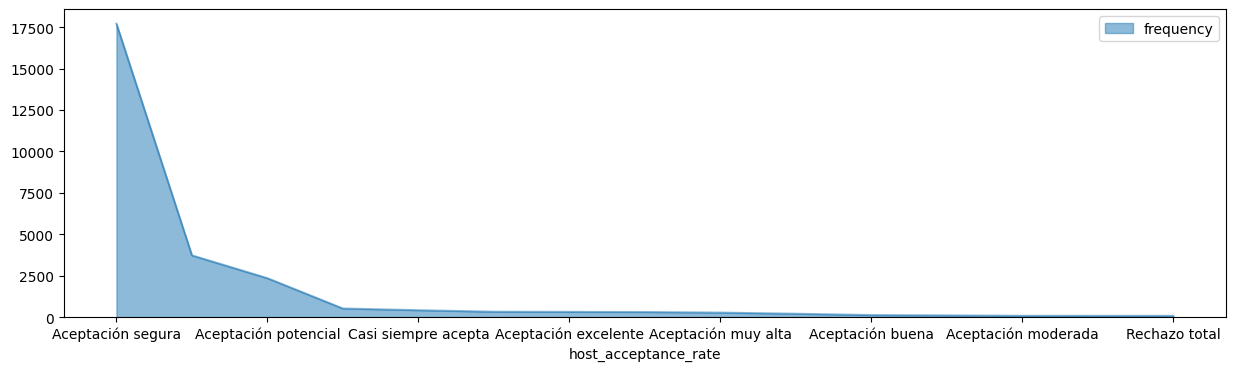

In [16]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)